In [1]:
!pip install hist
!pip install mplhep
!pip install pickle5

     |████████████████████████████████| 40 kB 1.6 MB/s eta 0:00:011
     |████████████████████████████████| 1.6 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 2.3 MB/s eta 0:00:01
  Created wheel for pickle5: filename=pickle5-0.0.11-cp39-cp39-linux_x86_64.whl size=255185 sha256=cf33c931b7e70cb6cbc7440a9b932b5aefd5c046fe4ef3ad16a4856c772a6a5b
  Stored in directory: /root/.cache/pip/wheels/f2/7a/49/9bef8878949914ecb90c08fc5bf30a05e17f475fe7e08b63a8
Successfully built pickle5


In [339]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle as pkl
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

In [340]:
from python import binning

In [341]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [342]:
with open("pkl_files/gen_with_asym_pt_fineMbin_nonjet_syst.pkl", "rb") as f:
    output = pkl.load( f )

with open("pkl_files/pt0-13000_data_new_fine_mbins.pkl", "rb") as f:
    output_data = pkl.load( f )
    
with open('pkl_files/gen_with_asym_pt_fineMbin_jk.pkl', "rb") as f:
    output_jk = pkl.load(f)

In [343]:
output_jk['jackknife_response_g']

Hist(
  StrCategory(['UL16NanoAODv9', 'UL18NanoAODv9', 'UL17NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  IntCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], growth=True, name='jk', label='Jackknife categories'),
  Regular(70, 0, 70, name='bin_gen', label='Generator'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  Regular(238, 0, 238, name='bin_reco', label='Detector'),
  storage=Weight()) # Sum: WeightedSum(value=1.85733e+06, variance=571385)

In [344]:
output['response_matrix_g']

Hist(
  StrCategory(['UL16NanoAODv9', 'UL18NanoAODv9', 'UL17NanoAODv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([140, 200, 260, 350, 460, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable(array([0.000e+00, 7.500e+00, 1.500e+01, 2.250e+01, 3.000e+01, 3.250e+01,
       3.500e+01, 3.750e+01, 4.000e+01, 4.500e+01, 5.000e+01, 5.500e+01,
       6.000e+01, 6.500e+01, 7.000e+01, 7.500e+01, 8.000e+01, 8.500e+01,
       9.000e+01, 9.500e+01, 1.000e+02, 1.125e+02, 1.250e+02, 1.375e+02,
       1.500e+02, 1.625e+02, 1.750e+02, 1.875e+02, 2.000e+02, 3.275e+03,
       6.350e+03, 9.425e+03, 1.300e+04]), name='mreco', label='m_{RECO} (GeV)'),
  Variable([140, 200, 260, 350, 460, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 30, 40, 60, 80, 100, 150, 200, 13000], name='mgen', label='Mass (GeV)'),
  StrCategory(['nominal', 'puUp', 'puDown', 'elerecoUp', 'elerecoDown', 'eleidUp', 'eleidDown', 'murecoUp', 'murecoDown', 'muidUp', 'muidDown', 'mutrigUp',

In [345]:
ptreco_center = output['response_matrix_g'].axes[1].centers
ptreco_width = output['response_matrix_g'].axes[1].widths
ptreco_edge = output['response_matrix_g'].axes[1].edges

ptgen_center = output['response_matrix_g'].axes[3].centers
ptgen_width = output['response_matrix_g'].axes[3].widths
ptgen_edge = output['response_matrix_g'].axes[3].edges
mreco_center = output['response_matrix_g'].axes[2].centers
mreco_edge = output['response_matrix_g'].axes[2].edges
mgen_center = output['response_matrix_g'].axes[4].centers

mreco_width = output['response_matrix_g'].axes[2].widths
mgen_width = output['response_matrix_g'].axes[4].widths
mgen_edge = output['response_matrix_g'].axes[4].edges


In [346]:
bins = binning.binning(mbinsGen =mgen_edge,mbinsDet = mreco_edge, ptbinsGen = ptgen_edge, ptbinsDet = ptreco_edge )

mbinsGen  =  bins.mbinsGen
mbinsDet  =  bins.mbinsDet
ptbinsGen =  bins.ptbinsGen
ptbinsDet =  bins.ptbinsDet


nmbinsGen  =  bins.nmbinsGen
nmbinsDet  =  bins.nmbinsDet
nptbinsGen =  bins.nptbinsGen
nptbinsDet =  bins.nptbinsDet

In [347]:
mbinsDet

array([0.000e+00, 7.500e+00, 1.500e+01, 2.250e+01, 3.000e+01, 3.250e+01,
       3.500e+01, 3.750e+01, 4.000e+01, 4.500e+01, 5.000e+01, 5.500e+01,
       6.000e+01, 6.500e+01, 7.000e+01, 7.500e+01, 8.000e+01, 8.500e+01,
       9.000e+01, 9.500e+01, 1.000e+02, 1.125e+02, 1.250e+02, 1.375e+02,
       1.500e+02, 1.625e+02, 1.750e+02, 1.875e+02, 2.000e+02, 3.275e+03,
       6.350e+03, 9.425e+03, 1.300e+04])

In [348]:
resp_syst_dic_np = {}
resp_syst_dic_np_error = {}

M = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(bins.genDist,bins.detDist,"M")


h = bins.detDist.CreateHistogram("h")

hup = bins.detDist.CreateHistogram("hup")
hdn = bins.detDist.CreateHistogram("hdn")



htrue = bins.genDist.CreateHistogram("htrue")
htruef = bins.genDist.CreateHistogram("htruef")

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hup (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hdn (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htrue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htruef (Potential memory leak).


In [349]:
print(M.GetNbinsY())
print(M.GetNbinsX() )

238
70


In [350]:
# M_np = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen","bin_reco").values(flow = True)
# M_np_error = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen","bin_reco").variances(flow = True)

# h_np = output_data['tunfold_reco_g'][{'systematic':'nominal'}].project("bin_reco").values(flow = True)
# h_np_error = output_data['tunfold_reco_g'][{'systematic':'nominal'}].project("bin_reco").variances(flow = True)

# htrue_np = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen").values(flow = True)
# htrue_np_error = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen").variances(flow = True)
# resp_syst_dic_np = {}
# resp_syst_dic_np_error = {}
# # for sys in sys_list:    
# #     Msyst = output['tunfold_migration_u'][{"systematic": sys}].project("bin_gen","bin_reco").view(flow=True).value

# #     Msyst_error = output['tunfold_migration_u'][{"systematic": sys}].project("bin_gen","bin_reco").view(flow=True).variance**0.5
# #     resp_syst_dic_np.update({sys: Msyst})
# #     resp_syst_dic_np_error.update({sys: Msyst_error})

In [351]:
# M_np.shape

In [352]:
closure = False
groomed = True

In [353]:
# sys_list = [ 'puUp', 'puDown', 'elerecoUp', 'elerecoDown', 'murecoUp', 'murecoDown', 'JERUp', 'JERDown', 'JES_AbsoluteMPFBiasUp', 'JES_AbsoluteMPFBiasDown',
#  'JES_AbsoluteScaleUp', 'JES_AbsoluteScaleDown', 'JES_AbsoluteStatUp', 'JES_AbsoluteStatDown', 'JES_FlavorQCDUp', 'JES_FlavorQCDDown', 'JES_FragmentationUp',
#  'JES_FragmentationDown', 'JES_PileUpDataMCUp', 'JES_PileUpDataMCDown', 'JES_PileUpPtBBUp', 'JES_PileUpPtBBDown', 'JES_PileUpPtEC1Up', 'JES_PileUpPtEC1Down',
#  'JES_PileUpPtEC2Up', 'JES_PileUpPtEC2Down', #'JES_PileUpPtHFUp', 'JES_PileUpPtHFDown', 
#  'JES_PileUpPtRefUp', 'JES_PileUpPtRefDown', 'JES_RelativeFSRUp', 
#  'JES_RelativeFSRDown', 'JES_RelativeJEREC1Up', 'JES_RelativeJEREC1Down', 'JES_RelativeJEREC2Up', 'JES_RelativeJEREC2Down',# 'JES_RelativeJERHFUp', 'JES_RelativeJERHFDown',
#  'JES_RelativePtBBUp', 'JES_RelativePtBBDown', 'JES_RelativePtEC1Up', 'JES_RelativePtEC1Down', #'JES_RelativePtEC2Up', 'JES_RelativePtEC2Down', 
#  #'JES_RelativePtHFUp', 'JES_RelativePtHFDown',
#  'JES_RelativeBalUp', 'JES_RelativeBalDown', 'JES_RelativeSampleUp', 'JES_RelativeSampleDown', 'JES_RelativeStatECUp', 'JES_RelativeStatECDown',
#  'JES_RelativeStatFSRUp', 'JES_RelativeStatFSRDown', #'JES_RelativeStatHFUp', 'JES_RelativeStatHFDown',
#  'JES_SinglePionECALUp', 'JES_SinglePionECALDown', 'JES_SinglePionHCALUp', 'JES_SinglePionHCALDown', 'JES_TimePtEtaUp', 'JES_TimePtEtaDown']

In [354]:
sys_list = ['puUp', 'puDown', 'elerecoUp', 'elerecoDown', 'eleidUp', 'eleidDown', 'murecoUp', 'murecoDown', 'muidUp', 'muidDown', 'mutrigUp', 'mutrigDown', 'pdfUp', 'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 'JERUp', 'JERDown']

In [355]:
if groomed:
    M_np = output['tunfold_migration_g'][{'systematic':'nominal', 'dataset':'UL18NanoAODv9'}].project("bin_gen","bin_reco").values(flow = True)
    M_np_error = output['tunfold_migration_g'][{'systematic':'nominal', 'dataset':'UL18NanoAODv9'}].project("bin_gen","bin_reco").variances(flow = True)

    if closure:
        h_np = output['tunfold_reco_g'][{'systematic':'nominal','dataset':'UL18NanoAODv9'}].project("bin_reco").values(flow = True)
        h_np_error = output['tunfold_reco_g'][{'systematic':'nominal','dataset':'UL18NanoAODv9'}].project("bin_reco").values(flow = True)
    else:
        h_np = output_data['tunfold_reco_g'][{'systematic':'nominal','dataset':['SingleMuon_UL2018', 'EGamma_UL2018']}].project("bin_reco").values(flow = True)
        h_np_error = output_data['tunfold_reco_g'][{'systematic':'nominal','dataset':['SingleMuon_UL2018', 'EGamma_UL2018']}].project("bin_reco").variances(flow = True)


    htrue_np = output['tunfold_migration_g'][{'systematic':'nominal', 'dataset':'UL18NanoAODv9'}].project("bin_gen").values(flow = True)
    htrue_np_error = output['tunfold_migration_g'][{'systematic':'nominal', 'dataset':'UL18NanoAODv9'}].project("bin_gen").variances(flow = True)
    resp_syst_dic_np = {}
    resp_syst_dic_np_error = {}
#     for sys in sys_list:
#         Msyst = output['tunfold_migration_g'][{"systematic": sys, 'dataset' : "UL18NanoAODv9"}].project("bin_gen","bin_reco").view(flow=True).value

#         Msyst_error = output['tunfold_migration_g'][{"systematic": sys, 'dataset' : "UL18NanoAODv9"}].project("bin_gen","bin_reco").view(flow=True).variance**0.5
#         resp_syst_dic_np.update({sys: Msyst})
#         resp_syst_dic_np_error.update({sys: Msyst_error})
else:
    M_np = output['tunfold_migration_u'][{'systematic':'nominal', 'dataset':'UL18NanoAODv9'}].project("bin_gen","bin_reco").values(flow = True)
    M_np_error = output['tunfold_migration_u'][{'systematic':'nominal', 'dataset':'UL18NanoAODv9'}].project("bin_gen","bin_reco").variances(flow = True)

    if closure:
        h_np = output['tunfold_reco_u'][{'systematic':'nominal','dataset':'UL18NanoAODv9'}].project("bin_reco").values(flow = True)
        h_np_error = output['tunfold_reco_u'][{'systematic':'nominal','dataset':'UL18NanoAODv9'}].project("bin_reco").variances(flow = True)
    else:
        h_np = output_data['tunfold_reco_u'][{'systematic':'nominal','dataset':['SingleMuon_UL2018', 'EGamma_UL2018']}].project("bin_reco").values(flow = True)
        h_np_error = output_data['tunfold_reco_u'][{'systematic':'nominal','dataset':['SingleMuon_UL2018', 'EGamma_UL2018']}].project("bin_reco").variances(flow = True)


    htrue_np = output['tunfold_migration_u'][{'systematic':'nominal', 'dataset':'UL18NanoAODv9'}].project("bin_gen").values(flow = True)
    htrue_np_error = output['tunfold_migration_u'][{'systematic':'nominal', 'dataset':'UL18NanoAODv9'}].project("bin_gen").variances(flow = True)
    resp_syst_dic_np = {}
    resp_syst_dic_np_error = {}
#     for sys in sys_list:    
#         Msyst = output['tunfold_migration_u'][{"systematic": sys, 'dataset' : "UL18NanoAODv9"}].project("bin_gen","bin_reco").view(flow=True).value

#         Msyst_error = output['tunfold_migration_u'][{"systematic": sys, 'dataset' : "UL18NanoAODv9"}].project("bin_gen","bin_reco").view(flow=True).variance**0.5
#         resp_syst_dic_np.update({sys: Msyst})
#         resp_syst_dic_np_error.update({sys: Msyst_error})
                                      

/tmp/ipykernel_245/1136699596.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.reshape(mat_sym, (40,40))))


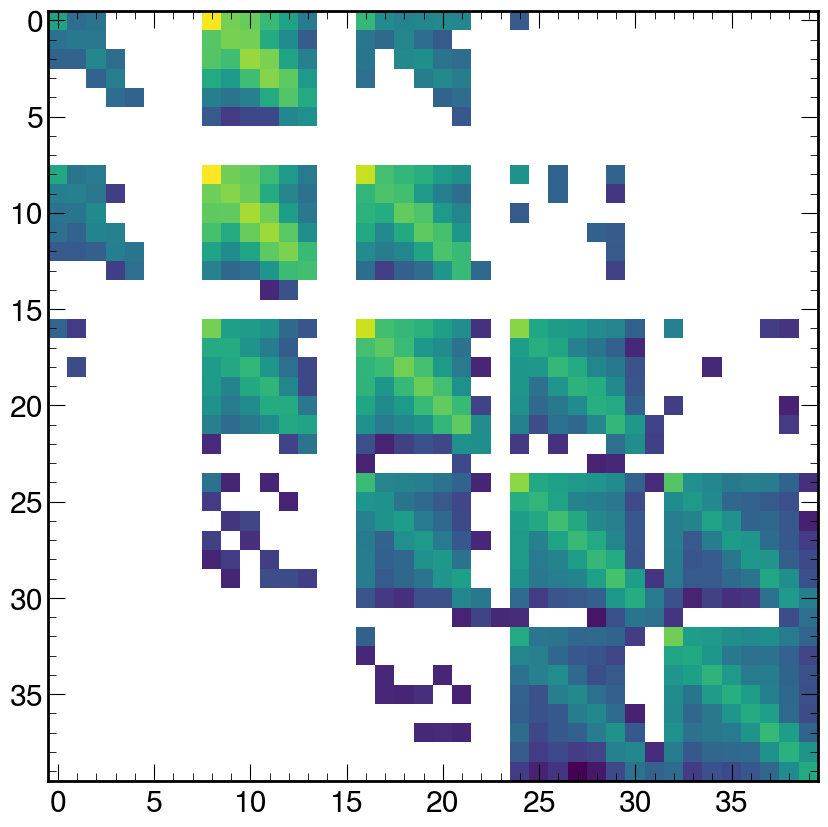

In [386]:
import hist
mat_sym = output['response_matrix_g'][{'systematic':'nominal',}].project('ptgen', 'mgen', 'ptreco', 'mreco')[:,:,:,hist.rebin(4)].values() 
plt.imshow(np.log(np.reshape(mat_sym, (40,40))))


In [391]:
np.linalg.cond(np.reshape(mat_sym, (40,40)))

5.741792142042757e+19

In [356]:
if groomed:
    M_np = output['tunfold_migration_g'][{'systematic':'nominal',}].project("bin_gen","bin_reco").values(flow = True)
    M_np_error = output['tunfold_migration_g'][{'systematic':'nominal',}].project("bin_gen","bin_reco").variances(flow = True)

    if closure:
        h_np = output['tunfold_reco_g'][{'systematic':'nominal'}].project("bin_reco").values(flow = True)
        h_np_error = output['tunfold_reco_g'][{'systematic':'nominal'}].project("bin_reco").values(flow = True)
    else:
        h_np = output_data['tunfold_reco_g'][{'systematic':'nominal'}].project("bin_reco").values(flow = True)
        h_np_error = output_data['tunfold_reco_g'][{'systematic':'nominal'}].project("bin_reco").variances(flow = True)


    htrue_np = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen").values(flow = True)
    htrue_np_error = output['tunfold_migration_g'][{'systematic':'nominal'}].project("bin_gen").variances(flow = True)
    resp_syst_dic_np = {}
    resp_syst_dic_np_error = {}
    
    for sys in sys_list:
        Msyst = output['tunfold_migration_g'][{"systematic": sys}].project("bin_gen","bin_reco").view(flow=True).value

        Msyst_error = output['tunfold_migration_g'][{"systematic": sys}].project("bin_gen","bin_reco").view(flow=True).variance**0.5
        resp_syst_dic_np.update({sys: Msyst})
        resp_syst_dic_np_error.update({sys: Msyst_error})
else:
    M_np = output['tunfold_migration_u'][{'systematic':'nominal'}].project("bin_gen","bin_reco").values(flow = True)
    M_np_error = output['tunfold_migration_u'][{'systematic':'nominal'}].project("bin_gen","bin_reco").variances(flow = True)

    if closure:
        h_np = output['tunfold_reco_u'][{'systematic':'nominal'}].project("bin_reco").values(flow = True)
        h_np_error = output['tunfold_reco_u'][{'systematic':'nominal'}].project("bin_reco").variances(flow = True)
    else:
        h_np = output_data['tunfold_reco_u'][{'systematic':'nominal'}].project("bin_reco").values(flow = True)
        h_np_error = output_data['tunfold_reco_u'][{'systematic':'nominal'}].project("bin_reco").variances(flow = True)


    htrue_np = output['tunfold_migration_u'][{'systematic':'nominal', }].project("bin_gen").values(flow = True)
    htrue_np_error = output['tunfold_migration_u'][{'systematic':'nominal', }].project("bin_gen").variances(flow = True)
    resp_syst_dic_np = {}
    resp_syst_dic_np_error = {}
    for sys in sys_list:    
        Msyst = output['tunfold_migration_u'][{"systematic": sys, }].project("bin_gen","bin_reco").view(flow=True).value

        Msyst_error = output['tunfold_migration_u'][{"systematic": sys, }].project("bin_gen","bin_reco").view(flow=True).variance**0.5
        resp_syst_dic_np.update({sys: Msyst})
        resp_syst_dic_np_error.update({sys: Msyst_error})
                                      

In [357]:
if groomed:
    resp_jk_np = []
    for i in range(10):
        resp_jk_np.append(output_jk['jackknife_response_g'][{'systematic':'nominal', 'jk':i}].project("bin_gen","bin_reco").values(flow = True))
    resp_jk_error = np.sqrt(10/9)*np.std(resp_jk_np, axis = 0)
else:
    resp_jk_np = []
    for i in range(10):
        resp_jk_np.append(output_jk['jackknife_response_u'][{'systematic':'nominal', 'jk':i}].project("bin_gen","bin_reco").values(flow = True))
    resp_jk_error = np.sqrt(10/9)*np.std(resp_jk_np, axis = 0)

In [358]:
for i in range(M.GetNbinsX()+2):
    for j in range(M.GetNbinsY()+2):
        M.SetBinContent(i, j, M_np[i][j])
        M.SetBinError(i, j, resp_jk_error[i][j]**0.5)
        
resp_syst_dic = {}           
for sys in sys_list:
    print(sys)
    resp_syst_dic.update({sys: ROOT.TUnfoldBinning.CreateHistogramOfMigrations(bins.genDist,bins.detDist,sys)})
    for i in range(M.GetNbinsX()+2):
        for j in range(M.GetNbinsY()+2):
            resp_syst_dic[sys].SetBinContent(i, j, resp_syst_dic_np[sys][i,j])
            resp_syst_dic[sys].SetBinError(i, j, resp_jk_error[i,j])
resp_jk = []
for i_jk in range(10):
    resp_jk.append(ROOT.TUnfoldBinning.CreateHistogramOfMigrations(bins.genDist,bins.detDist,sys) )
    for i in range(M.GetNbinsX()+2):
        for j in range(M.GetNbinsY()+2):
            resp_jk[i_jk].SetBinContent(i, j, resp_jk_np[i_jk][i,j])
            resp_jk[i_jk].SetBinError(i, j, resp_jk_error[i,j])    
for i in range(h.GetNbinsX()+2):
    h.SetBinContent(i, h_np[i])
    h.SetBinError(i, h_np_error[i]**0.5)
    
for i in range(htrue.GetNbinsX()+2):
    htrue.SetBinContent(i, htrue_np[i])
    htrue.SetBinError(i, htrue_np_error[i]**0.5)
    

puUp
puDown
elerecoUp
elerecoDown
eleidUp
eleidDown
murecoUp
murecoDown
muidUp
muidDown
mutrigUp
mutrigDown
pdfUp
pdfDown
q2Up
q2Down
prefiringUp
prefiringDown
JERUp
JERDown


Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: JERDown (Potential memory leak).


In [359]:
ptgen_center_uf = np.insert(ptgen_center, 0, -5)
mgen_center_uf = np.insert(ptgen_center, 0, -5)
ptreco_center_uf = np.insert(ptreco_center, 0, -5)
mgen_width_uf = np.insert(mgen_width, 0, 1)
mgen_width_f = np.insert(mgen_width_uf, -1, 10000)
mreco_width_uf = np.insert(mreco_width, 0, 1)
signalBinning = bins.genDist
detectorDistribution = bins.detDist

def rowNormM(M):
    M_norm = M.Clone('row_norm')
    for i in range(0, M.GetNbinsX()+2):
        integral = M.Integral(i, i, 0, M.GetNbinsY()+1)
        if integral>0:
            for j in range(0, M.GetNbinsY()+2):
                M_norm.SetBinContent(i, j, M.GetBinContent(i,j)/integral)
    return M_norm

def NormM(M, mode = 'gen'):
    M_norm = M.Clone("M_norm")
    if mode == 'gen':
        print("Normalising in GEN axis")
        
        for pt in ptgen_center_uf:
            start_gen = signalBinning.GetGlobalBinNumber(-1,pt)
            end_gen = signalBinning.GetGlobalBinNumber(mgen_center_uf[-1]+10000,pt)
            # print(start_gen)
            # print(end_gen)
            # print(end_gen-start_gen)
            binsum = M.Integral(start_gen, end_gen, 0, M.GetNbinsY()+1)
            print(binsum)
            im = 0
            for ix in range(start_gen, end_gen+1):
                for iy in range(0, M.GetNbinsY()+1):
                    if binsum>0:
                        M_norm.SetBinContent(ix, iy, M.GetBinContent(ix, iy)/(binsum))
                im+=1
        return M_norm
    if mode == 'reco':
        print("Normalising in RECO axis")
        M_norm = M.Clone("M_norm")
        for pt in ptreco_center_uf:
            start_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[0],pt)
            end_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[-1],pt)
            print(start_reco)
            print(end_reco)
            # print(end_reco-start_reco)
            binsum = M.Integral( 0, M.GetNbinsX()+1, start_reco, end_reco)
            print(binsum)
            im = 0
            for ix in range(0, M.GetNbinsX()+1):
                for iy in range(start_reco, end_reco+1):
                    if binsum>0:
                        M_norm.SetBinContent(ix, iy, M.GetBinContent(ix, iy)/(binsum) )
                im+=1
        return M_norm

def NormOutput(h):
    h_norm = h.Clone("M_norm")
    for pt in ptgen_center_uf:
        start_gen = signalBinning.GetGlobalBinNumber(-1,pt)
        end_gen = signalBinning.GetGlobalBinNumber(mgen_center[-1],pt)
        
        binsum = h.Integral(start_gen, end_gen)
        print(binsum)
        im = 0
        for ix in range(start_gen, end_gen+1):
            if binsum>0:
                h_norm.SetBinContent(ix,  h.GetBinContent(ix)/(binsum) )
            im+=1
    return h_norm

# def NormInput(h):
#     h_norm = h.Clone("M_norm")
#     for pt in ptreco_center_uf:
#         start_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[0],pt)
#         end_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[-1],pt)
#         binsum = h.Integral(start_reco, end_reco)
#         print(binsum)
#         im = 0
            

In [360]:
def NormInput(h):
    print("Normalising Input")
    h_norm = h.Clone("M_norm")
    for pt in ptreco_center:
        start_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[0],pt)
        end_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[-1],pt)
        print(start_reco)
        print(end_reco)
        binsum = h.Integral(start_reco, end_reco)
        print(binsum)
        im = 0
        for ix in range(start_reco, end_reco):
            if binsum>0:
                h_norm.SetBinContent(ix,  h.GetBinContent(ix)/(binsum) )
            im+=1
    return h_norm

In [361]:
ptbinsGen

array([  140.,   200.,   260.,   350.,   460., 13000.])

In [362]:
## Condition Number
import numpy as np
np.linalg.cond(M_np)

inf

In [363]:
norm = False
if norm:
    mode = 'reco'
    M = rowNormM(M)
    M = NormM(M, mode = mode)
    #M = rowNormM(M)
    htrue = NormOutput(htrue)
    #h = NormInput(h)
    # for sys in sys_list:
    #     resp_syst_dic[sys] = NormM(resp_syst_dic[sys], mode = 'gen' )

In [364]:
c = ROOT.TCanvas()
htrue2 = M.ProjectionX()
htrue.SetMarkerStyle(4)
htrue.SetMarkerColor(2)
htrue2.SetMarkerStyle(2)
htrue2.Draw('p hist same')
htrue.Draw('hist same')
c.Draw()

In [365]:
%jsroot

In [366]:
c = ROOT.TCanvas()
h2 = M.ProjectionY()
h.SetMarkerStyle(4)
h.SetMarkerColor(2)
h2.SetMarkerStyle(2)
h2.Draw('p hist same')
h.Draw('hist same')

c.Draw()

In [367]:
lines_x = []
lines_y = []

for pt in ptgen_edge[1:-1]:
    lines_x.append(bins.genDist.GetGlobalBinNumber(-1,pt))

for pt in ptreco_edge[1:-1]:
    
    lines_y.append(bins.detDist.GetGlobalBinNumber(-1,pt))


print(lines_x)
print(lines_y)

[21, 31, 41, 51]
[69, 103, 137, 171]


In [368]:
label_lines_x = []
label_lines_y = []

for pt in ptgen_edge:
    
    label_lines_x.append(bins.genDist.GetGlobalBinNumber(70,pt))

for pt in ptreco_edge:
    
    label_lines_y.append(bins.detDist.GetGlobalBinNumber(70,pt))
print(label_lines_x)
print(label_lines_y)

[15, 25, 35, 45, 55, 65]
[50, 84, 118, 152, 186, 220]


In [369]:
arr = ptgen_edge
x_labels = np.array([str(int(x)) for x in arr])
print(x_labels)

['140' '200' '260' '350' '460' '13000']


In [370]:
%jsroot off

0
1
2
3
4
5
0
1
2
3
4
5


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TAxis::Sort>: Cannot sort. No labels
Warning in <TAxis::Sort>: Cannot sort. No labels


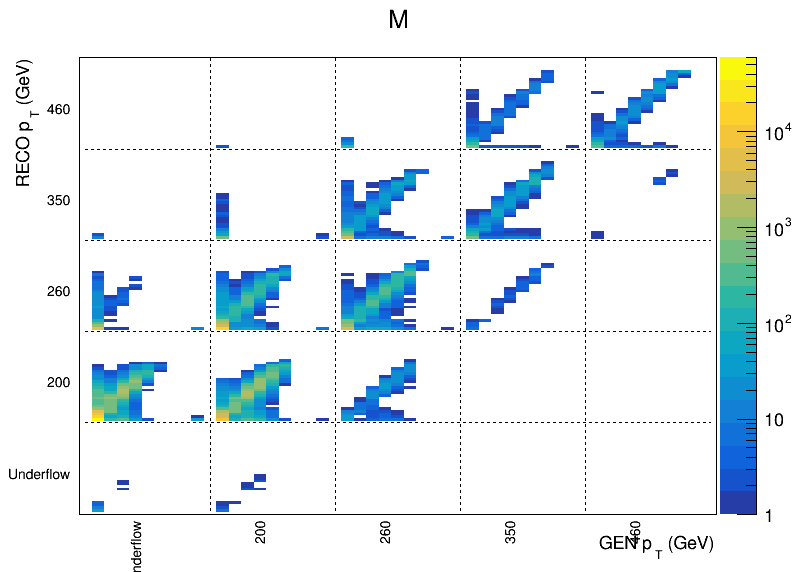

In [371]:

   
#M = rowNormM(M)
cM = ROOT.TCanvas('c','canvas',800,600)    

M.Draw('colz')
lines = []
cM1 = []
#Add vertical dashed lines at x = 20, 30, 40, 50
#lines_x = [20, 30, 40, 50]
for x in lines_x:
    line = ROOT.TLine(x, 35, x, 205)
    line.SetLineColor(ROOT.kBlack)
    line.SetLineStyle(2)  # Dashed line
    lines.append(line)  # Store line in the list
    line.Draw()

# Add horizontal dashed lines at y = 40, 80, 120
#lines_y = [40, 80, 120]
for y in lines_y:
    line = ROOT.TLine(11, y, 61, y)
    line.SetLineColor(ROOT.kBlack)
    line.SetLineStyle(2)  # Dashed line
    lines.append(line)  # Store line in the list
    line.Draw()




def set_custom_labels(axis, positions, labels):
    axis.SetLabelSize(0.0)
    for i, pos in enumerate(positions):
        bins = axis.FindBin(pos)
        print(i)
        axis.SetBinLabel(bins, labels[i])
    axis.SetLabelSize(0.04)

x_labels =['Underflow', '200' ,'260' ,'350' ,'460' ,'13000',]
y_labels = ['Underflow', '200' ,'260', '350' ,'460' ,'13000',]

M.GetXaxis().LabelsOption("h")
M.GetYaxis().LabelsOption("v")

M.GetXaxis().SetRange(11,61 )
M.GetYaxis().SetRange(35,205 )
M.GetXaxis().SetTickLength(0)
M.GetYaxis().SetTickLength(0)

M.GetXaxis().SetTitle("GEN p_{T} (GeV)")
M.GetYaxis().SetTitle("RECO p_{T} (GeV)")
M.GetYaxis().SetTitleOffset(1.2)
set_custom_labels(M.GetXaxis(), label_lines_x, x_labels)
set_custom_labels(M.GetYaxis(), label_lines_y, y_labels)

cM1.append(cM)
cM.Draw()

cM.SetLogz()
    


In [372]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[]"

#u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)
#u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
u = ROOT.TUnfoldDensity(M,orientation,regMode,con, mode, bins.genBin, bins.detBin, "signal", axisSteering)




u.SetInput( h )




nScan=50
tauMin= 0
tauMax= 0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)




iBest = u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
#iBest = u.ScanTau(nScan, tauMin, tauMax, logTauX, ROOT.TUnfoldDensity.kEScanTauRhoAvg, 'signal', axisSteering, lCurve)
#print(iBest)
    
#u.DoUnfold(0.0)
cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
#cov = u.GetEmatrixTotal("ematrix","Covariance Matrix", "signal", "*[]", False)

cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 29 output bins do not depend on the input data  0-1 4-9 11 18-19 21 28-29 31 39 41 51 61-71
Info in <TUnfold::TUnfold>: 238 input bins and 43 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (signal:ptgen[ufl]:massgen[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #4 (signal:ptgen[ufl]:massgen[40,60])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #5 (signal:ptgen[ufl]:massgen[60,80])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #6 (signal:ptgen[ufl]:massgen[80,100])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (signal:ptgen[ufl]:massgen[100,150])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (signal:ptgen[ufl]:massgen[150,200])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (signal:ptgen[ufl]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfoldin

46



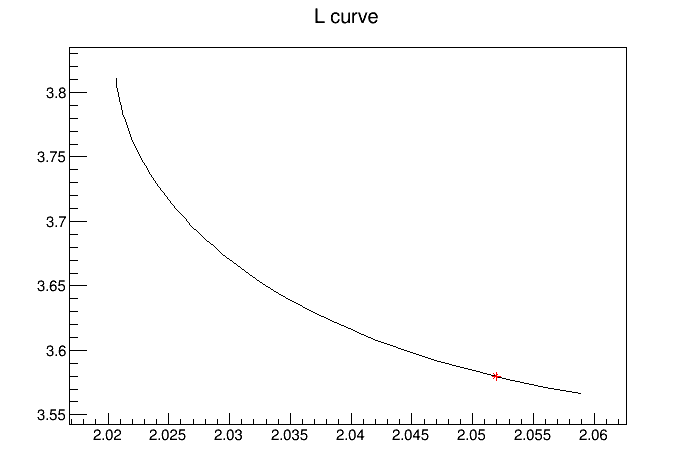

In [373]:
cL = ROOT.TCanvas()

x = array.array('d',[0] )
y = array.array('d',[0] )
lCurve.Draw('alp same')
lCurve.GetPoint(iBest, x, y)

bestLCurve=ROOT.TGraph(1,x,y)
bestLCurve.SetMarkerStyle(3)
bestLCurve.SetMarkerColor(ROOT.kRed)
bestLCurve.Draw('same *')
cL.Draw()
print(iBest)
print()

In [374]:
#o = u.GetOutput("unfolded signal",'output')
o = u.GetOutput("unfolded signal",'output','signal','*[]',ROOT.kFALSE);
if norm:
    o = NormOutput(o)

Warning in <TROOT::Append>: Replacing existing TH1: unfolded signal (Potential memory leak).


In [375]:
%jsroot

In [376]:
o.SetMarkerStyle(4)
o.SetLineColor(ROOT.kBlack)

htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
htrue.Draw("hist p same ")
o.Draw("hist same e")



leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with  uncertainty"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


In [319]:
%jsroot off

In [320]:
list_sys = []
for sys in sys_list:
    list_sys.append(u.GetDeltaSysSource(sys, sys))

Warning in <TROOT::Append>: Replacing existing TH1: puUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: puDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: elerecoUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: elerecoDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: eleidUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: eleidDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: murecoUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: murecoDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: muidUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: muidDown (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mutrigUp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mutr

In [321]:
np.sum(resp_syst_dic_np['q2Down'])

190903.80004387384

In [322]:
# c = ROOT.TCanvas()
# a = u.GetDeltaSysSource('q2Up', 'q2Up', 'q2Up')
# a.Draw()
# c.Draw()

In [323]:
## normalise by reco bin

Info in <TUnfoldBinning::CreateErrorMatrixHistogram>: Original binning can not be represented on one axis
Warning in <TROOT::Append>: Replacing existing TH1: E (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: e (Potential memory leak).


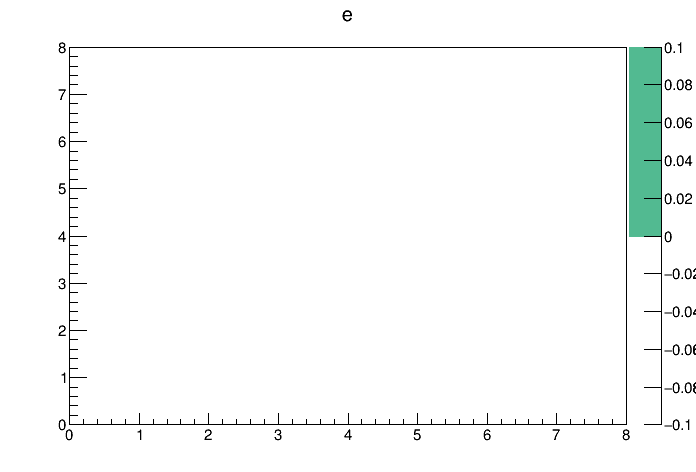

In [324]:
error = u.GetEmatrixTotal('E')

error_list = []
start = 72
end = 79
e = ROOT.TH2D('e', 'e', 8, 0,8, 8,0,8 )
for i in range(8):
    for j in range(8):
        e.SetBinContent(i,j, error.GetBinContent(start+i,start+j))
cE = ROOT.TCanvas()

e.Draw('colz')
cE.Draw()

In [325]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[]"

output_list = []
#u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)
#u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for sys in sys_list:
    
    u = ROOT.TUnfoldDensity(resp_syst_dic[sys],orientation,regMode,con, mode, bins.genBin, bins.detBin, "signal", axisSteering)





    u.SetInput( h )




    nScan=50
    tauMin= 0
    tauMax= 0
    iBest=0

    logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
    logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
    lCurve = ROOT.MakeNullPointer(ROOT.TGraph)




    iBest = u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
    #iBest = u.ScanTau(nScan, tauMin, tauMax, logTauX, ROOT.TUnfoldDensity.kEScanTauRhoAvg, 'signal', axisSteering, lCurve)
    #print(iBest)

    #u.DoUnfold(0.0)
    cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
    #cov = u.GetEmatrixTotal("ematrix","Covariance Matrix", "signal", "*[]", False)

    cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
    cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")
    output_list.append(u.GetOutput("unfolded signal "+sys,'output '+sys,'signal','*[]',ROOT.kFALSE))

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 29 output bins do not depend on the input data  0-1 4-9 11 18-19 21 28-29 31 39 41 51 61-71
Info in <TUnfold::TUnfold>: 238 input bins and 43 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (signal:ptgen[ufl]:massgen[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #4 (signal:ptgen[ufl]:massgen[40,60])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #5 (signal:ptgen[ufl]:massgen[60,80])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #6 (signal:ptgen[ufl]:massgen[80,100])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (signal:ptgen[ufl]:massgen[100,150])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (signal:ptgen[ufl]:massgen[150,200])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (signal:ptgen[ufl]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfoldin

In [326]:
sys_list_up = [sys for sys in sys_list if 'Down' in sys]
print(sys_list_up)

['puDown', 'elerecoDown', 'eleidDown', 'murecoDown', 'muidDown', 'mutrigDown', 'pdfDown', 'q2Down', 'prefiringDown', 'JERDown']


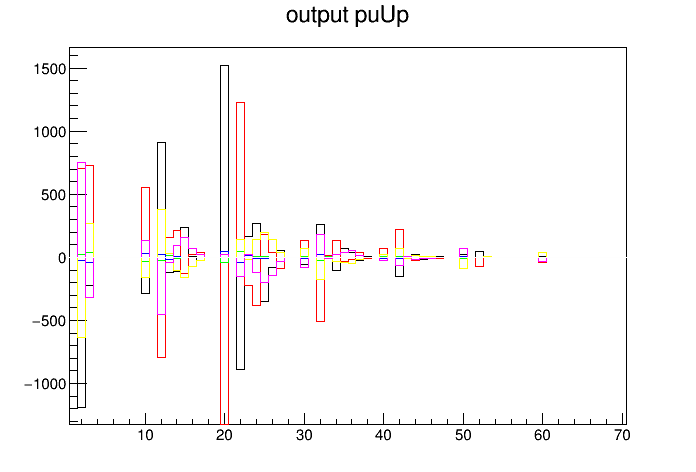

In [327]:
cN = ROOT.TCanvas()
diff_list_up = []
for i in range(len(sys_list_up)):
    
    output_list[i].SetLineColor(i+1)
    diff = output_list[i].Clone(str(i))
    
    diff.Add(o, -1)
    diff.Draw('same hist')
    diff_list_up.append(diff)
cN.Draw()



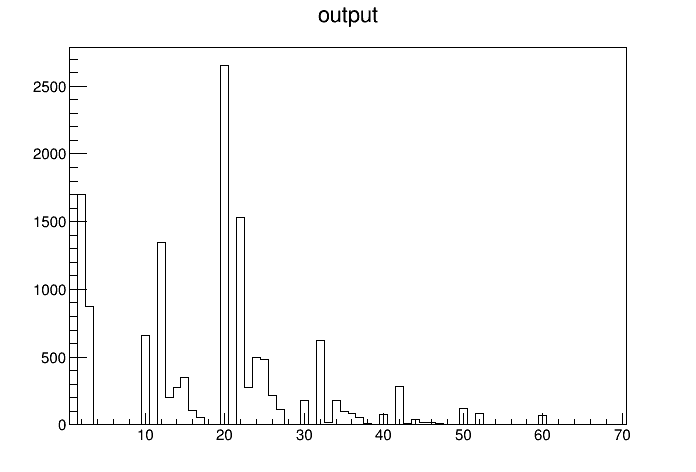

In [328]:
sys_error = o.Clone('Total Syst')
sys_error.Reset()
for d in diff_list_up:
    for i in range(1, sys_error.GetNbinsX()+1):
        sys_error.SetBinContent(i, sys_error.GetBinContent(i)+ d.GetBinContent(i)**2)
        
for i in range(1, sys_error.GetNbinsX()+1):
        sys_error.SetBinContent(i, sys_error.GetBinContent(i)**0.5)
        
cSys = ROOT.TCanvas()
sys_error.Draw()
cSys.Draw()

In [329]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[]"

output_list_jk = []
#u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)
#u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
for i in range(10):
    
    u = ROOT.TUnfoldDensity(resp_jk[i],orientation,regMode,con, mode, bins.genBin, bins.detBin, "signal", axisSteering)





    u.SetInput( h )




    nScan=50
    tauMin= 0
    tauMax= 0
    iBest=0

    logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
    logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
    lCurve = ROOT.MakeNullPointer(ROOT.TGraph)




    iBest = u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
    #iBest = u.ScanTau(nScan, tauMin, tauMax, logTauX, ROOT.TUnfoldDensity.kEScanTauRhoAvg, 'signal', axisSteering, lCurve)
    #print(iBest)

    #u.DoUnfold(0.0)
    cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
    #cov = u.GetEmatrixTotal("ematrix","Covariance Matrix", "signal", "*[]", False)

    cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
    cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")
    output_list_jk.append(u.GetOutput("unfolded signal "+sys,'output '+sys,'signal','*[]',ROOT.kFALSE))

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 29 output bins do not depend on the input data  0-1 4-9 11 18-19 21 28-29 31 39 41 51 61-71
Info in <TUnfold::TUnfold>: 238 input bins and 43 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (signal:ptgen[ufl]:massgen[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #4 (signal:ptgen[ufl]:massgen[40,60])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #5 (signal:ptgen[ufl]:massgen[60,80])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #6 (signal:ptgen[ufl]:massgen[80,100])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (signal:ptgen[ufl]:massgen[100,150])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (signal:ptgen[ufl]:massgen[150,200])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (signal:ptgen[ufl]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfoldin

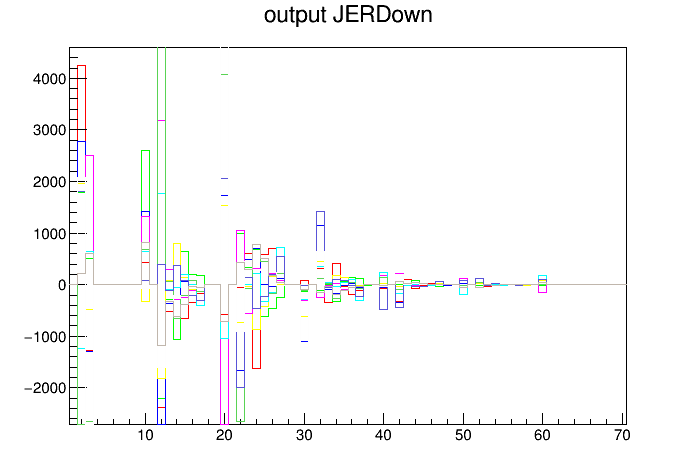

In [330]:
cN = ROOT.TCanvas()
diff_list_jk = []
for i in range(10):
    
    output_list_jk[i].SetLineColor(i+2)
    diff = output_list_jk[i].Clone(str(i))
    
    diff.Add(o, -1)
    diff.Draw('same hist')
    diff_list_jk.append(diff)
cN.Draw()


In [331]:
diff_jk_list = []
for diff in diff_list_jk:
    diff_jk = []
    for i in range(1, sys_error.GetNbinsX()+1):
        diff_jk.append(diff.GetBinContent(i)) 
    diff_jk_list.append(diff_jk)
stat_error_np = np.sqrt(10/9) * np.std(diff_jk_list, axis = 0)

In [332]:
stat_error = o.Clone('Total Stat')
stat_error.Reset()

        
for i in range(1, sys_error.GetNbinsX()+1):
    stat_error.SetBinContent(i, stat_error_np[i-1])

In [333]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import mplhep as hep

class AsymmetricErrorPlot:
    def __init__(self):
        self.masses = []
        self.values = []
        self.values_data = []
        self.widths = []
        self.stat_unc_up = []
        self.stat_unc_down = []
        self.syst_unc_up = []
        self.syst_unc_down = []

    def add_data_points(self, x_data, y_data, y2_data, x_widths):
        self.masses = x_data
        self.values_data = y2_data
        self.values = y_data
        self.widths = x_widths
        self.stat_unc_up = [0] * len(x_data)
        self.stat_unc_down = [0] * len(x_data)
        self.syst_unc_up = [0] * len(x_data)
        self.syst_unc_down = [0] * len(x_data)

    def add_stat_unc(self, stat_unc_up, stat_unc_down):
        if len(stat_unc_up) != len(self.masses) or len(stat_unc_down) != len(self.masses):
            raise ValueError("Length of statistical uncertainties must match the number of data points.")
        self.stat_unc_up = stat_unc_up
        self.stat_unc_down = stat_unc_down

    def add_syst_unc(self, syst_unc_up, syst_unc_down):
        if len(syst_unc_up) != len(self.masses) or len(syst_unc_down) != len(self.masses):
            raise ValueError("Length of systematic uncertainties must match the number of data points.")
        self.syst_unc_up = syst_unc_up
        self.syst_unc_down = syst_unc_down

    def plot(self, xlabel='Mass (GeV)', ylabel='N / dG / dM_jet', custom_text='pT 170-200 GeV', pt_text = 'pt not defined', lumi_text = None):
        
        # Convert lists to numpy arrays for easier manipulation
        masses = np.array(self.masses)
        values = np.array(self.values)
        values_data = np.array(self.values_data)
        stat_unc_up = np.array(self.stat_unc_up)
        stat_unc_down = np.array(self.stat_unc_down)
        syst_unc_up = np.array(self.syst_unc_up)
        syst_unc_down = np.array(self.syst_unc_down)
        widths = np.array(self.widths)
        
        # Calculate total uncertainty as a combination of statistical and systematic uncertainties
        total_unc_up = np.sqrt(stat_unc_up**2 + syst_unc_up**2)
        total_unc_down = np.sqrt(stat_unc_down**2 + syst_unc_down**2)

        # Create figure and grid spec layout
        fig = plt.figure(figsize=(10, 8))
        
        #gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
        ax1 = plt.subplot()

        
        # Plot main data with error bars
        for (mass, value, stat_err_up, stat_err_down, total_err_up, total_err_down, width) in zip(masses, values, stat_unc_up, stat_unc_down, total_unc_up, total_unc_down, widths):
            # Total uncertainties
            ax1.add_patch(plt.Rectangle((mass - width / 2, value - total_err_down), width, total_err_up + total_err_down, edgecolor='cyan', facecolor='cyan', label='Total Unc.'))
            # Statistical uncertainties
            #ax1.add_patch(plt.Rectangle((mass - width / 2, value - stat_err_down), width, stat_err_up + stat_err_down ,facecolor='none', hatch='/////', label='Stat. Unc.'))
            ax1.add_patch(plt.Rectangle((mass - width / 2, value - stat_err_down), width, stat_err_up + stat_err_down ,edgecolor='b', facecolor='b', label='Stat. Unc.'))
        
        ax1.scatter(masses, values, label='Unfolded Mass', color='red', marker='o')
        ax1.scatter(masses, values_data, label='True', color='black', marker = 'x')

        # Remove duplicate labels
        handles, labels = ax1.get_legend_handles_labels()
        
        handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
        handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
        labels.append(custom_text)
        labels.append(pt_text )

# Add legend with the custom entry

        by_label = dict(zip(labels, handles))
        ax1.legend(by_label.values(), by_label.keys(), fontsize = 15)

        # Set labels and text
        ax1.set_ylabel(ylabel)
        ax1.set_xlabel(xlabel)
        ax1.set_xlim(0,200)
        #ax1.text(0.50, 0.50, custom_text, ha='center', va='center', transform=ax1.transAxes, fontsize=22)
        hep.cms.text('Preliminary', ax = ax1)
        if lumi_text!=None:
            hep.cms.lumitext(str(lumi_text), ax = ax1)
        else:
            hep.cms.lumitext('13 TeV', ax = ax1)
        #ax1.set_yscale('log')
        # Ratio plot
        plt.show()
        return ax1, fig


In [334]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[]"

#u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)
#u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
u = ROOT.TUnfoldDensity(M,orientation,regMode,con, mode, bins.genBin, bins.detBin, "signal", axisSteering)




u.SetInput( h )




nScan=50
tauMin= 0
tauMax= 0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)




iBest = u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
#iBest = u.ScanTau(nScan, tauMin, tauMax, logTauX, ROOT.TUnfoldDensity.kEScanTauRhoAvg, 'signal', axisSteering, lCurve)
#print(iBest)
    
#u.DoUnfold(0.0)
cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
#cov = u.GetEmatrixTotal("ematrix","Covariance Matrix", "signal", "*[]", False)

cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 29 output bins do not depend on the input data  0-1 4-9 11 18-19 21 28-29 31 39 41 51 61-71
Info in <TUnfold::TUnfold>: 238 input bins and 43 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (signal:ptgen[ufl]:massgen[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #4 (signal:ptgen[ufl]:massgen[40,60])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #5 (signal:ptgen[ufl]:massgen[60,80])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #6 (signal:ptgen[ufl]:massgen[80,100])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (signal:ptgen[ufl]:massgen[100,150])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (signal:ptgen[ufl]:massgen[150,200])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (signal:ptgen[ufl]:massgen[200,1.3e+04])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfoldin

In [377]:
%jsroot
o.SetMarkerStyle(4)
o.SetLineColor(ROOT.kBlack)

htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
htrue.Draw("hist p same ")
o.Draw("hist same e")



leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with  uncertainty"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


pt  170.0
start  12
end  19
[0.0009210413056762837, 0.000269882498989896, 0.0003333734222601235, 0.00019192600238065978, 7.933179229357225e-05, 3.425144923428538e-05, 0.0, 0.0]


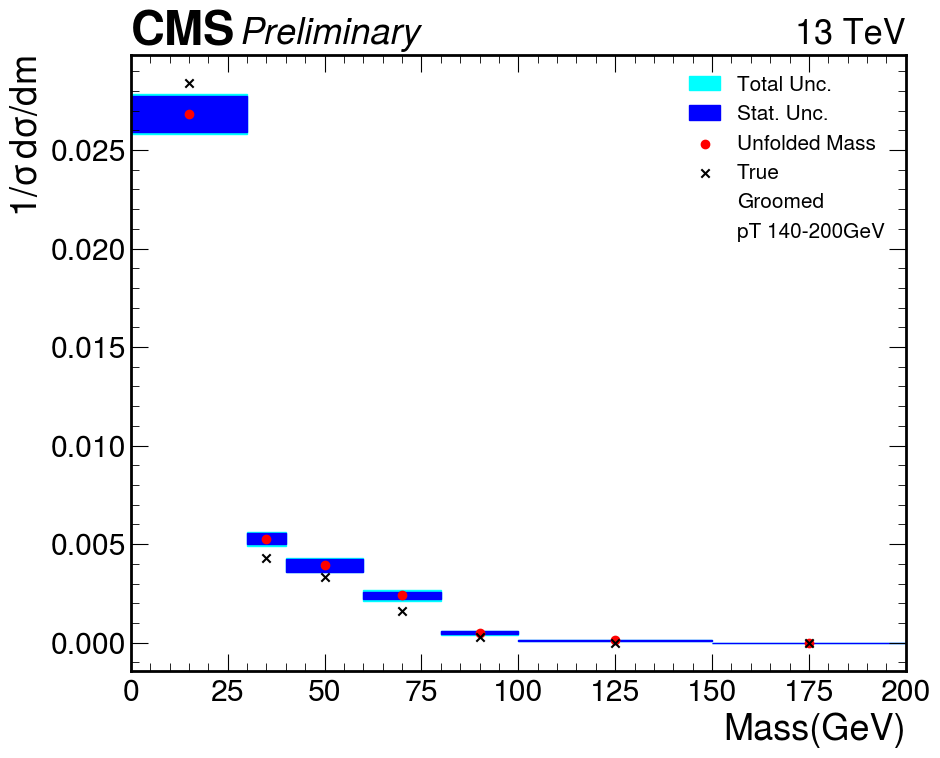

pt  230.0
start  22
end  29
[0.0005347424513467186, 0.00044609730026309705, 0.000522228952150728, 0.0002734893538405015, 0.00020025615820078356, 7.21428487380489e-05, 0.0, 0.0]


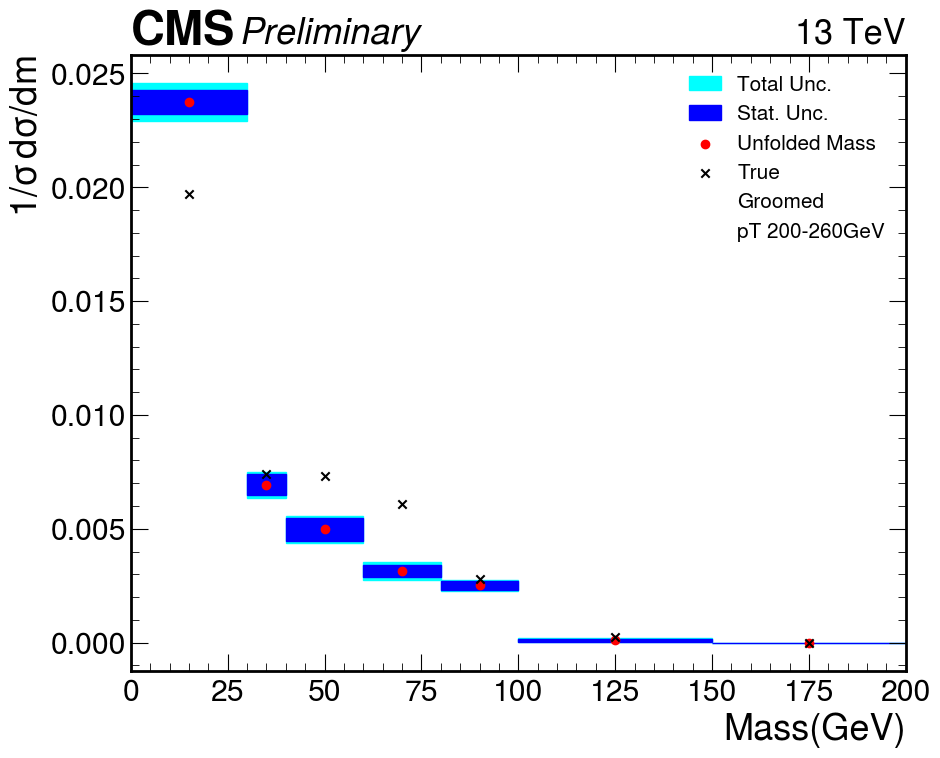

pt  305.0
start  32
end  39
[0.000868037936142887, 0.0005544391498231902, 0.0005352111211394343, 0.0002118365031637978, 0.00021262133754128797, 0.00011198210449455372, 5.165735993111578e-06, 0.0]


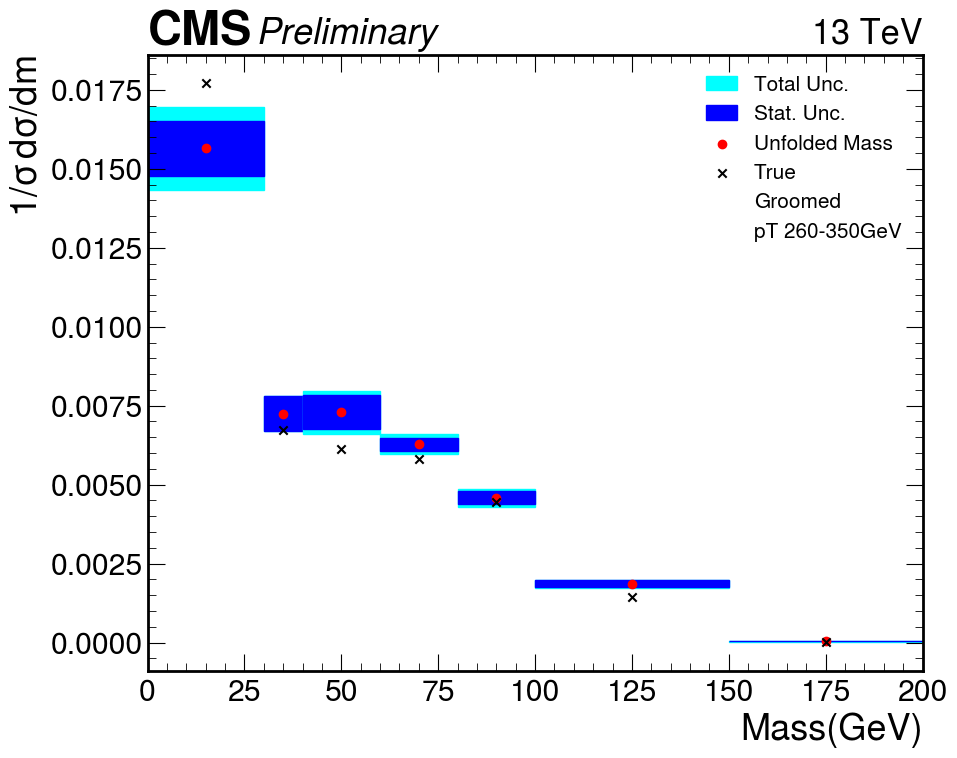

pt  405.0
start  42
end  49
[0.0008506498875927216, 0.0004382192306694174, 0.00026780432114216154, 0.00010933807521113858, 9.489413061466466e-05, 6.003807838762932e-05, 1.0189829403450297e-05, 1.4721043240152141e-08]


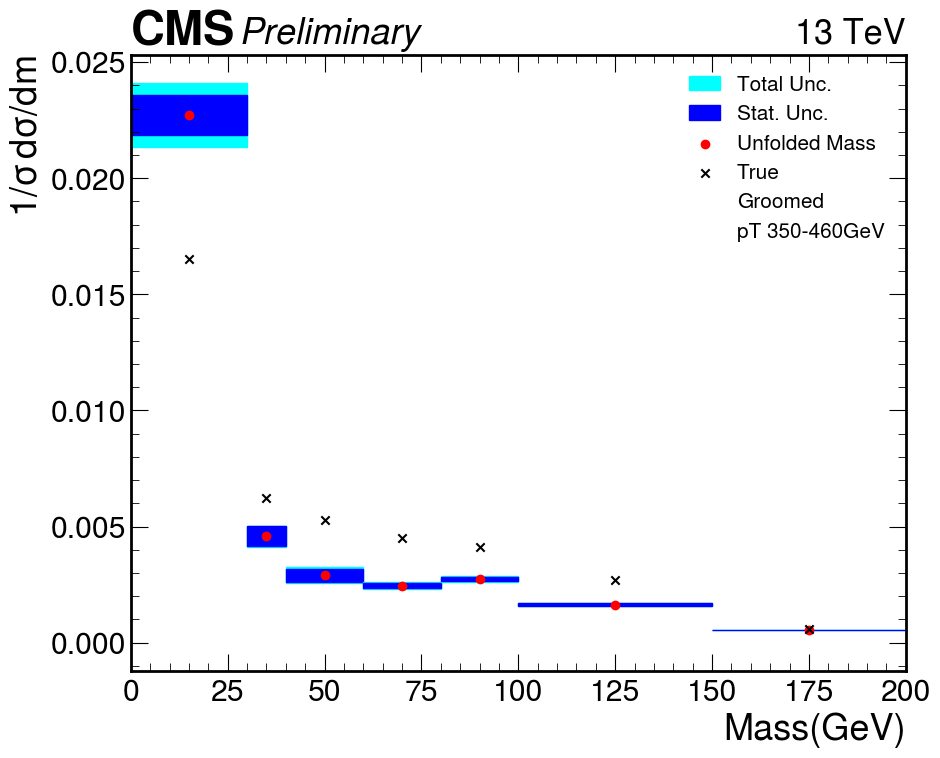

pt  6730.0
start  52
end  59
[0.0013392828924368605, 0.0006492953734674417, 0.0002995389681435775, 0.0001072348552016478, 9.9564249463648e-05, 4.236508830781939e-05, 2.7823179805464796e-05, 2.5902389073102528e-08]


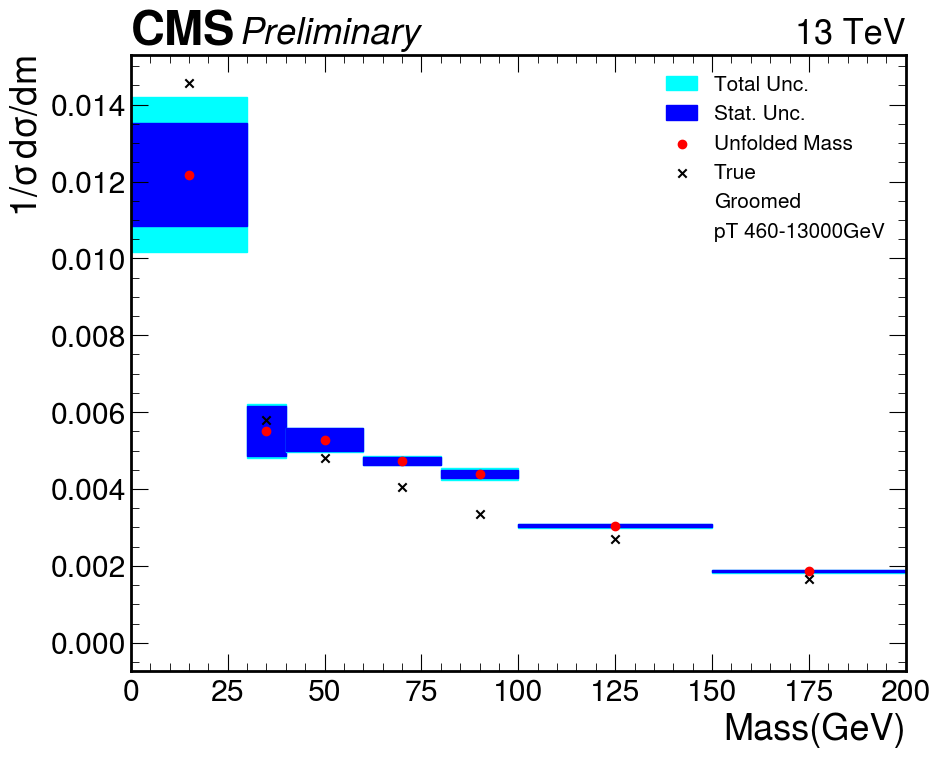

IndexError: index 6 is out of bounds for axis 0 with size 6

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Warning in <TROOT::Append>: Replacing existing TH1: unfolded_pt0 (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


In [380]:
import mplhep as hep
hep.style.use('CMS')
i = 10
clist = []
hcopylist = []
truelist = []
legend = []

for ipt in range(9): 
    
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    hcopy = ROOT.TH1F("unfolded_pt" + str(ipt), "Unfolded ungroomed Jet Mass for p_{T}= " + str(ptbinsGen[ipt])[:-2] +" - " +str(ptbinsGen[ipt+1])[:-2] +'GeV', nmbinsGen, mbinsGen )
    true = hcopy.Clone("True")
    hcopy2 = hcopy.Clone("Sys")
    m_int = 0
    m_true_int = 0
    print("pt " , ptgen_center[ipt])
    print("start " , bins.genDist.GetGlobalBinNumber(mgen_center[0], ptgen_center[ipt]))
    print("end " , bins.genDist.GetGlobalBinNumber(mgen_center[nmbinsGen-1], ptgen_center[ipt]))
    for im in range(nmbinsGen):
        #print(im + ipt*(nmbinsGen+2) + 2)
        # print("mass ", mgen_center[im])
       
        
        bin_number = bins.genDist.GetGlobalBinNumber(mgen_center[im], ptgen_center[ipt])
        
        m_int = m_int + o.GetBinContent(bin_number)
        m_true_int = m_true_int + htrue.GetBinContent(bin_number)
    #print(m_int)
    for im in range(nmbinsGen):
        #print(im + ipt*(nmbinsGen+2) + 2)
        # print("mass ", mgen_center[im])
        # print("pt " , ptgen_center[ipt])
        width = mgen_width[im]
        #print(width)
        bin_number = bins.genDist.GetGlobalBinNumber(mgen_center[im], ptgen_center[ipt])
        # print("global bin number ",bin_number)
        # print(" bin content ",o.GetBinContent(bin_number ) )
        # print(" Total bin error ",oTotal.GetBinError(bin_number ) )
        #print("bincontent/bin_width normalised by integral ", o.GetBinContent(bin_number )/(m_int*width) )
        hcopy.SetBinContent(im+1, o.GetBinContent(bin_number )/(m_int*width))
        hcopy.SetBinError(im+1, stat_error.GetBinContent(bin_number )/(m_int*width ))
        hcopy2.SetBinContent(im+1, o.GetBinContent(bin_number )/(m_int*width))
        
        hcopy2.SetBinError(im+1, sys_error.GetBinContent(bin_number )/(m_int*width ))

        true.SetBinContent(im+1, htrue.GetBinContent(bin_number)/(m_true_int*width))
    
    hcopy.GetXaxis().SetTitle("Mass (GeV)")
    hcopy.GetYaxis().SetTitle("1/#sigma d#sigma/dM_{Jet}" )
    hcopy.GetXaxis().SetRangeUser(0,200)
    true.GetXaxis().SetRangeUser(0,200)
    hcopy.SetMarkerStyle(2)
    true.SetMarkerStyle(4)
    true.SetMarkerColor(2)
    #hcopy2.SetFillColor(ROOT.kBlue -10)
    hcopy2.SetFillColorAlpha(ROOT.kBlue,0.5)
    
    hcopy.Draw(' same p')
    hcopy2.Draw(' same e2 p')
    true.Draw('p same')
    leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
    leg.SetTextSize(0.03)
    legstr = "Unfolded"
    leg.AddEntry(hcopy, legstr, "p")
    leg.AddEntry(true, "True", "p")
    leg.SetBorderSize(0)
    leg.Draw()
    legend.append(leg)
    clist.append(ci)
    hcopylist.append(hcopy)
    hcopylist.append(hcopy2)
    truelist.append(true)
    ci.Draw()
    y_data = []
    y2_data = []
    up = []
    down = []
    stat = []
    for iy in range(1, hcopy.GetNbinsX()+1 ):
        y_data.append(hcopy.GetBinContent(iy))
        # up.append(hSysUp.GetBinError(iy))
        # down.append(hSysDown.GetBinError(iy))
        up.append(hcopy2.GetBinError(iy))
        down.append(hcopy2.GetBinError(iy))
        y2_data.append(true.GetBinContent(iy))
        stat.append(hcopy.GetBinError(iy))
    x_data = output['response_matrix_g'][{'systematic':'nominal'}].project('mgen').axes[0].centers   
    widths = output['response_matrix_g'][{'systematic':'nominal'}].project('mgen').axes[0].widths
    stat_unc_up = stat
    stat_unc_down = stat
    print(stat)
    plotter = AsymmetricErrorPlot()
    plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=widths)
    plotter.add_stat_unc(stat_unc_up, stat_unc_down)
    plotter.add_syst_unc(up, down)
    ax1, fig = plotter.plot(ylabel=r'$1/\sigma \, d\sigma/dm$', xlabel = 'Mass(GeV)' ,custom_text=r'Groomed',pt_text=r'pT '+ str(ptbinsGen[ipt])[:-2]+'-'+str(ptbinsGen[ipt+1])[:-2] + 'GeV')
    ax1.set_xlabel("Mass (GeV)")
    plt.show()
        

In [ ]:
import matplotlib.pyplot as plt
output['response_matrix_g'][{'systematic':'nominal'}].project('mgen').plot(binwnorm = 1)
plt.xlim(0,200)